In [9]:
#import library
import pandas as pd
import numpy as np

#source data : https://statlearning.com/data.html
#data read 
df=pd.read_csv("C:/Users/Nemo/Desktop/Thesis/Advertising.csv",usecols=[1,2,3,4]) 
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [10]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.3 KB


In [14]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [16]:
df.describe().T #Transpose

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [ ]:
#Bir reklam harcamasi kalenlerini ifade eden bir veri seti. 
#Tv,radioya gazateye, reklamlar veriliyor ve reklamlar neticesinden satislar elde ediliyor.
#Iste bu satislar ile farkli kalemlerde verilen reklam harcamalarinin  giderlerini ortaya cikaran yapiyla ilgili veri seti.




In [17]:
df.isnull().values.any() #missing data 

False

In [18]:
df.corr() #tv ile satis arasinda guzel korelasyon yorumu tv harcanmalari artdikqca salesde artacak + pozitive yonlu iliski

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


C:\Users\Nemo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


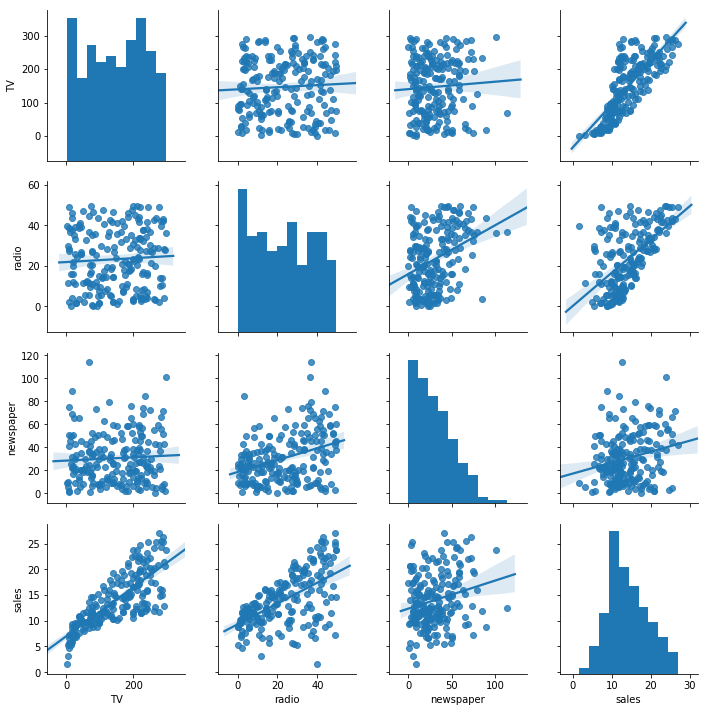

In [24]:
import seaborn as sns 
sns.pairplot(df,kind ="reg");

C:\Users\Nemo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


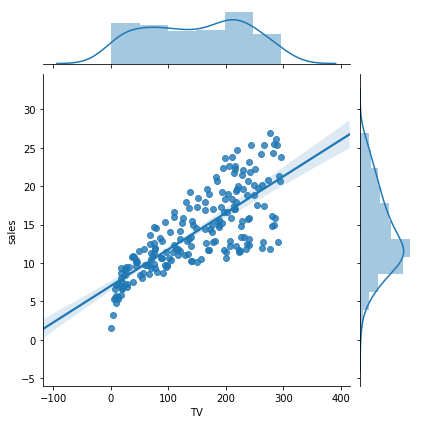

In [26]:
sns.jointplot(x="TV", y="sales", data=df, kind="reg")

## Statsmodels ile modelleme

In [75]:
import statsmodels.api as sm

In [76]:
X=df[["TV"]]
X[0:5]     

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [77]:
X=sm.add_constant(X)

In [78]:
X[0:5]

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [79]:
y=df["sales"]
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [80]:
lm=sm.OLS(y,X)


In [81]:
model=lm.fit()

In [82]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 05 Jan 2021   Prob (F-statistic):           1.47e-42
Time:                        22:26:24   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
import statsmodels.formula.api as smf
lm=smf.ols("sales-TV",df)
model=lm.fit()
model.summary()

PatsyError: model is missing required outcome variables

In [84]:
model.params

const    7.032594
TV       0.047537
dtype: float64

In [85]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [86]:
model.conf_int()

,0,1
const,6.129719,7.935468
TV,0.042231,0.052843


In [87]:
model.f_pvalue

1.467389700194647e-42

In [88]:
print("f_pvalue: ", "%.4f" % model.f_pvalue)

f_pvalue:  0.0000


In [89]:
print("fvalue: ", "%.2f" % model.fvalue)

fvalue:  312.14


In [90]:
print("tvalue: ", "%.2f" % model.tvalues[0:1])

tvalue:  15.36


In [91]:
model.mse_model

3314.618166868649

In [92]:
model.rsquared_adj

0.6099148238341623

In [93]:
model.fittedvalues[0:5] #modelin icindeki y degerleri

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [94]:
y[0:5] #modeldeki gercek degerler

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [95]:
print("Sales = " +  str("%.2f" % model.params[0]) + " + TV" + "*" + str("%.2f" % model.params[1]))

Sales = 7.03 + TV*0.05


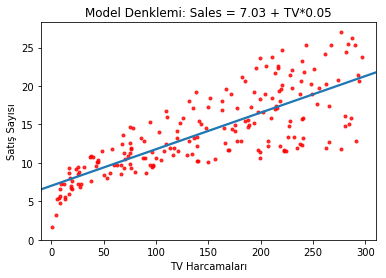

In [60]:
g = sns.regplot(df["TV"], df["sales"], ci=None, scatter_kws={'color':'r', 's':9})
g.set_title("Model Denklemi: Sales = 7.03 + TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
import matplotlib.pyplot as plt
plt.xlim(-10,310)
plt.ylim(bottom=0);

In [61]:
from sklearn.linear_model import LinearRegression

In [97]:
X = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(X, y)

print(model.intercept_)
print(model.coef_)

7.032593549127695
[0.04753664]


In [99]:
model.score(X,y) #r^2

0.611875050850071

In [64]:
model.predict(X)[0:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])

## Prediciton

Model denklemi:

Sales = 7.03 + TV*0.04

Örneğin 30 birim TV harcaması olduğunda satışların tahmini değeri ne olur?

In [100]:
7.03+30*0.04

8.23

In [65]:
X = df[["TV"]]
y = df["sales"]
reg = LinearRegression()
model = reg.fit(X, y)

In [66]:
model.predict([[30]])

array([8.45869276])

In [67]:
yeni_veri = [[5],[90],[200]]

In [68]:
model.predict(yeni_veri)

array([ 7.27027675, 11.31089119, 16.53992164])